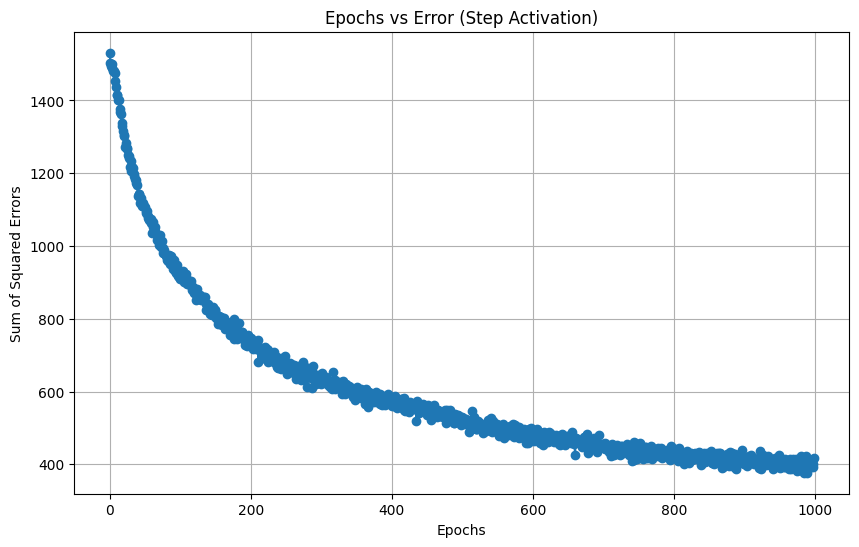

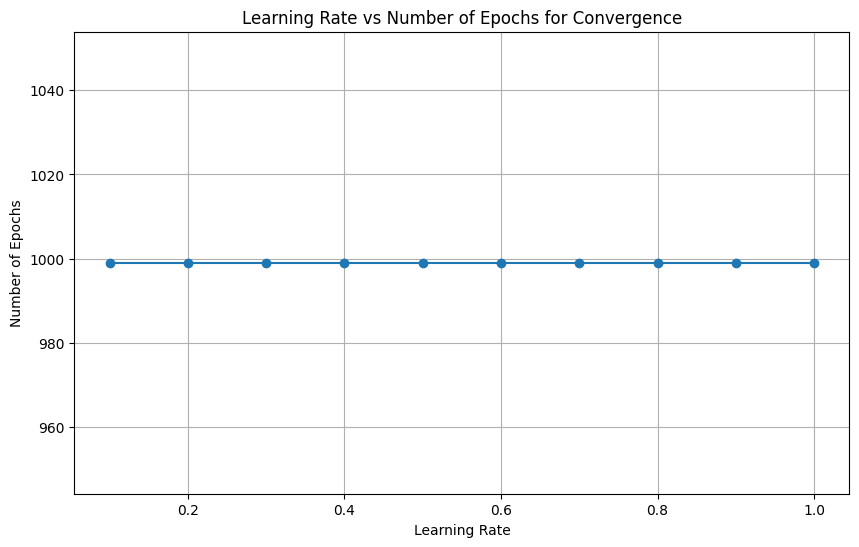

In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define activation functions
def step_activation(x):

    return 1 if x >= 0 else 0

def bipolar_step_activation(x):

    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

def sigmoid_activation(x):

    return 1 / (1 + np.exp(-x))

def tanh_activation(x):

    return np.tanh(x)

def relu_activation(x):

    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):

    return x if x > 0 else alpha * x

def summation_unit(inputs, weights):
    """Calculates the weighted sum of inputs."""
    return np.dot(inputs, weights[:-1]) + weights[-1]

def error_comparator(y_true, y_pred):
    """Calculates the sum of squared errors."""
    return np.sum((y_true - y_pred) ** 2)

def preprocess_data(df):
    """Preprocesses the data by converting text to numerical format using TF-IDF."""
    # Initialize TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Combine English and Hindi columns into one
    combined_text = df['ENGLISH'].astype(str) + " " + df['HINDI'].astype(str)

    # Apply TF-IDF Vectorization to combined text
    X_combined = tfidf_vectorizer.fit_transform(combined_text).toarray()


    y = np.random.randint(0, 2, size=X_combined.shape[0])

    return X_combined, y

def train_perceptron(X, y, activation_func, learning_rate=0.05, max_epochs=1000, error_threshold=0.002, initial_weights=None):
    """Trains a perceptron using the given training data and activation function."""
    num_features = X.shape[1]
    weights = initial_weights if initial_weights is not None else np.random.rand(num_features + 1).astype(np.float64)  # Initialize weights (including bias)

    sse_per_epoch = []

    X = X.astype(np.float64)  # Ensure input features are of type float
    y = y.astype(np.float64)  # Ensure target values are of type float

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            net_input = summation_unit(X[i], weights)
            predicted_output = activation_func(net_input)
            error = y[i] - predicted_output
            total_error += error ** 2

            # Update weights
            weights[:-1] += learning_rate * error * X[i]
            weights[-1] += learning_rate * error

        sse_per_epoch.append(total_error)

        # Check for convergence
        if total_error <= error_threshold:
            break

    return weights, epoch, sse_per_epoch

def experiment_with_learning_rates(X, y, activation_func, learning_rates, initial_weights):
    """Experiments with different learning rates and plots the results."""
    epochs_needed = []

    for lr in learning_rates:
        weights, epochs, _ = train_perceptron(X, y, activation_func, learning_rate=lr, initial_weights=initial_weights)
        epochs_needed.append(epochs)

    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, epochs_needed, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Epochs')
    plt.title('Learning Rate vs Number of Epochs for Convergence')
    plt.grid(True)
    plt.show()

def main():
    # Load the dataset
    file_path = 'Book1.xlsx'
    df = pd.read_excel(file_path)

    # Clean the dataset by removing rows with missing values
    df = df[['ENGLISH', 'HINDI']].dropna()

    # Preprocess data
    X, y = preprocess_data(df)

    # Define initial weights
    num_features = X.shape[1]
    initial_weights = np.array([10] * (num_features + 1), dtype=np.float64)  # Including bias term

    # A2: Train the perceptron with step activation function
    weights, epochs, sse_per_epoch = train_perceptron(X, y, step_activation, learning_rate=0.05, initial_weights=initial_weights)

    # Plot the sum of squared errors for each epoch
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs + 1), sse_per_epoch, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.title('Epochs vs Error (Step Activation)')
    plt.grid(True)
    plt.show()

    # A3: Experiment with varying learning rates
    learning_rates = [0.1 * i for i in range(1, 11)]
    experiment_with_learning_rates(X, y, step_activation, learning_rates, initial_weights)

if __name__ == "__main__":
    main()
